### **1. Importações**

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn

import matplotlib.pyplot as plt
import datetime as dt

bibliotecas = {
    "Pandas":pd,
    "Numpy":np,
    "Seaborn":sns,
    "Matplotlib":matplotlib,
    "Sklearn":sklearn}

print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Matplotlib           |      3.9.0
Numpy                |     1.26.4
Pandas               |      2.2.2
Seaborn              |     0.13.2
Sklearn              |      1.5.0


In [120]:
produtos = pd.read_csv('../data/annex1.csv')
vendas = pd.read_csv('../data/annex2.csv')
precos = pd.read_csv('../data/annex3.csv')
taxa_perda = pd.read_csv('../data/annex4.csv')

### **2. Alterações na base**

In [121]:
vendas.head(3)

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No


In [122]:
vendas['Date'] = pd.to_datetime(vendas['Date'], format="%Y-%m-%d")
vendas['Time'] = vendas['Time'].str.slice(0,5)
vendas['Time'] = pd.to_datetime(vendas['Time'], format='%H:%M')
vendas['Time'] = vendas['Time'].dt.strftime('%H:%M')
vendas.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17,102900005117056,0.409,7.6,sale,No
3,2020-07-01,09:19,102900005115823,0.421,10.0,sale,No
4,2020-07-01,09:20,102900005115908,0.539,8.0,sale,No


In [123]:
vendas['Dia'] = vendas['Date'].dt.day
vendas['Mês'] = vendas['Date'].dt.month
vendas['Hora'] = vendas['Time'].str.slice(0,2)
vendas['Total'] = round(vendas['Quantity Sold (kilo)'] * vendas['Unit Selling Price (RMB/kg)'],2)
vendas.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Dia,Mês,Hora,Total
0,2020-07-01,09:15,102900005117056,0.396,7.6,sale,No,1,7,09,3.01
1,2020-07-01,09:17,102900005115960,0.849,3.2,sale,No,1,7,09,2.72
2,2020-07-01,09:17,102900005117056,0.409,7.6,sale,No,1,7,09,3.11
3,2020-07-01,09:19,102900005115823,0.421,10.0,sale,No,1,7,09,4.21
4,2020-07-01,09:20,102900005115908,0.539,8.0,sale,No,1,7,09,4.31


In [124]:
base = pd.merge(vendas,produtos[['Item Code','Item Name','Category Name']], how='left', on='Item Code')
base.head(3)

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Dia,Mês,Hora,Total,Item Name,Category Name
0,2020-07-01,09:15,102900005117056,0.396,7.6,sale,No,1,7,09,3.01,Paopaojiao (Jingpin),Capsicum
1,2020-07-01,09:17,102900005115960,0.849,3.2,sale,No,1,7,09,2.72,Chinese Cabbage,Flower/Leaf Vegetables
2,2020-07-01,09:17,102900005117056,0.409,7.6,sale,No,1,7,09,3.11,Paopaojiao (Jingpin),Capsicum


### **3. Visualizações**

#### **3.1. Top 5 produtos mais vendidos por mês**

In [125]:
round(base.groupby('Mês')['Category Name'].value_counts('Mês'),2)


Mês  Category Name              
1    Flower/Leaf Vegetables         0.31
     Capsicum                       0.25
     Edible Mushroom                0.21
     Cabbage                        0.10
     Aquatic Tuberous Vegetables    0.09
                                    ... 
12   Edible Mushroom                0.24
     Capsicum                       0.19
     Aquatic Tuberous Vegetables    0.10
     Cabbage                        0.10
     Solanum                        0.03
Name: proportion, Length: 72, dtype: float64

In [126]:
a = base[base['Mês'] == 1].groupby('Mês')['Category Name'].value_counts('Mês')
a.index.get_level_values(1)

Index(['Flower/Leaf Vegetables', 'Capsicum', 'Edible Mushroom', 'Cabbage',
       'Aquatic Tuberous Vegetables', 'Solanum'],
      dtype='object', name='Category Name')

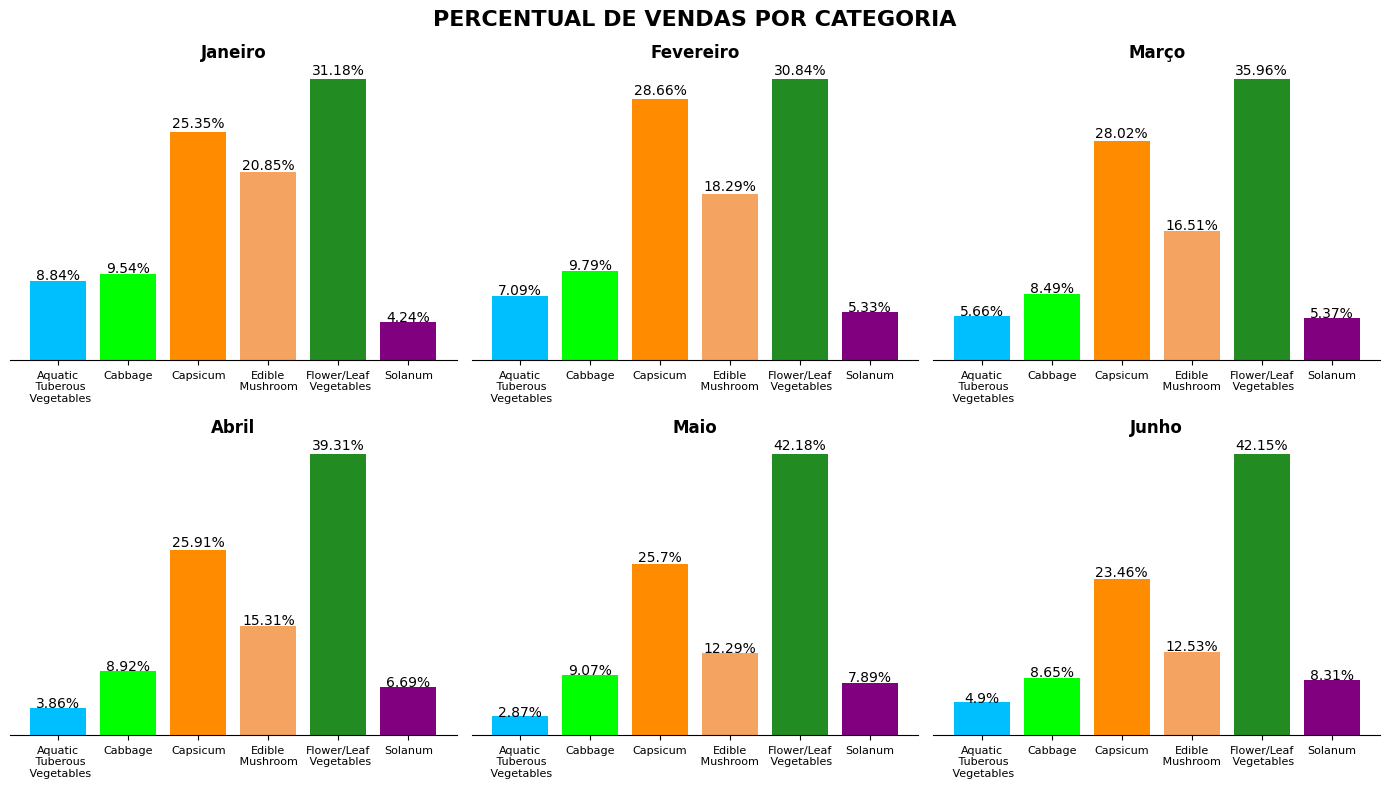

In [127]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(14,8), tight_layout=True)

nomes_meses = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho']
cores=['deepskyblue','lime','darkorange','sandybrown','forestgreen','purple']
titulos = ['Aquatic\n Tuberous\n Vegetables','Cabbage', 'Capsicum',  'Edible\n Mushroom ', 'Flower/Leaf\n Vegetables','Solanum']

for i,ax,nome_mes in zip(range(1,7),axs.flat, nomes_meses):
    a = base[base['Mês'] == i].groupby('Mês')['Category Name'].value_counts('Mês').sort_index()
    ax.bar(a.index.get_level_values(1), a.values, color=cores)
    ax.set_xticks(range(0,6))
    ax.spines[['top','left','right']].set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_title(nome_mes, fontweight="bold")
    for e in range(0,6):
        ax.annotate(f'{round(a.values[e]*100,2)}%',(e, a.values[e]+a.values[e]*0.02), ha='center')
    ax.set_xticklabels(titulos,fontsize=8)
plt.suptitle("PERCENTUAL DE VENDAS POR CATEGORIA", fontsize=16, fontweight='bold')
plt.show()

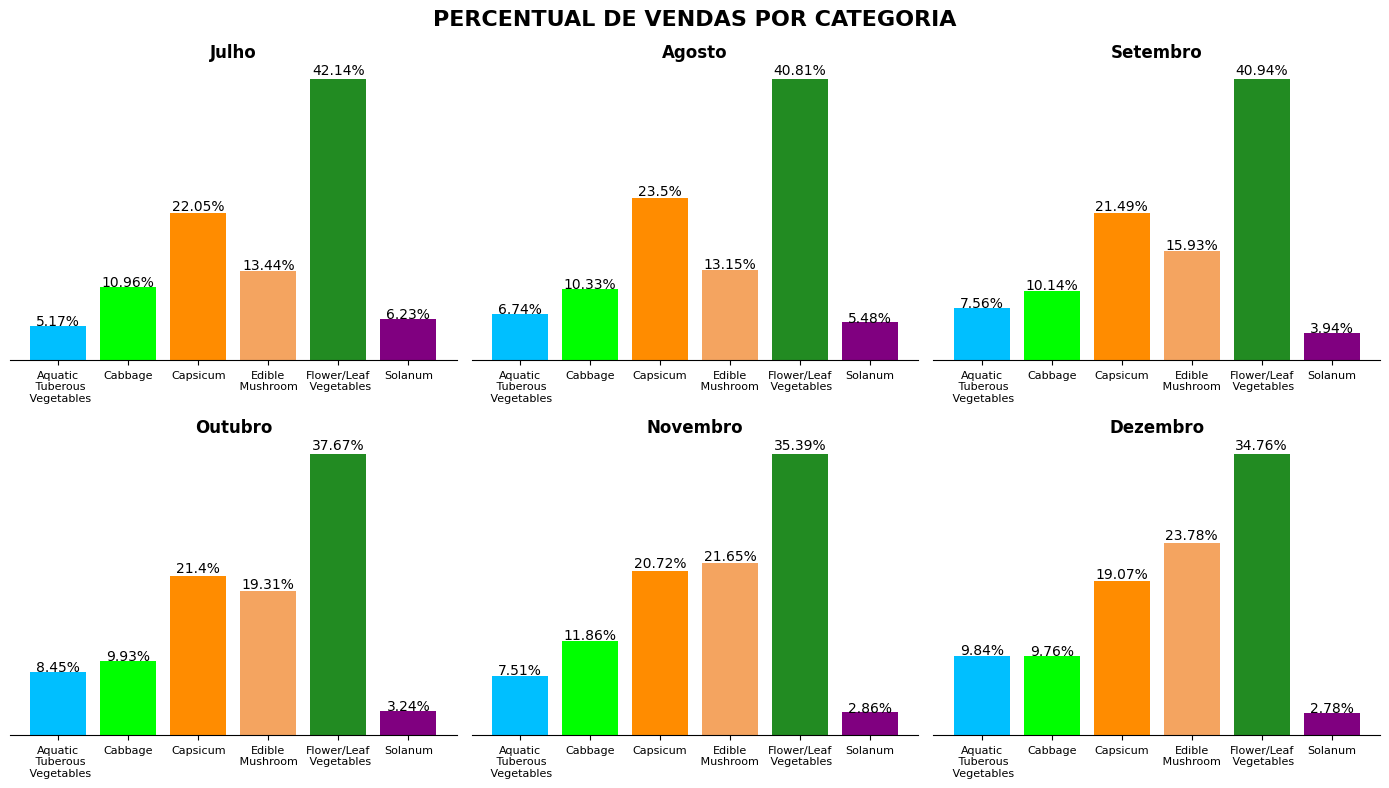

In [128]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(14,8), tight_layout=True)

nomes_meses = ['Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']
cores=['deepskyblue','lime','darkorange','sandybrown','forestgreen','purple']
titulos = ['Aquatic\n Tuberous\n Vegetables','Cabbage', 'Capsicum',  'Edible\n Mushroom ', 'Flower/Leaf\n Vegetables','Solanum']

for i,ax,nome_mes in zip(range(7,13),axs.flat, nomes_meses):
    a = base[base['Mês'] == i].groupby('Mês')['Category Name'].value_counts('Mês').sort_index()
    ax.bar(a.index.get_level_values(1), a.values, color=cores)
    ax.set_xticks(range(0,6))
    ax.spines[['top','left','right']].set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_title(nome_mes, fontweight='bold')
    for e in range(0,6):
        ax.annotate(f'{round(a.values[e]*100,2)}%',(e, a.values[e]+a.values[e]*0.02), ha='center')
    ax.set_xticklabels(titulos,fontsize=8)
plt.suptitle("PERCENTUAL DE VENDAS POR CATEGORIA", fontsize=16, fontweight='bold')
plt.show()

In [129]:
base_datas = base.copy()
base_datas = base_datas.set_index('Date')
base_datas.head(3)

,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Dia,Mês,Hora,Total,Item Name,Category Name
Date,,,,,,,,,,,,
2020-07-01,09:15,102900005117056,0.396,7.6,sale,No,1,7,09,3.01,Paopaojiao (Jingpin),Capsicum
2020-07-01,09:17,102900005115960,0.849,3.2,sale,No,1,7,09,2.72,Chinese Cabbage,Flower/Leaf Vegetables
2020-07-01,09:17,102900005117056,0.409,7.6,sale,No,1,7,09,3.11,Paopaojiao (Jingpin),Capsicum


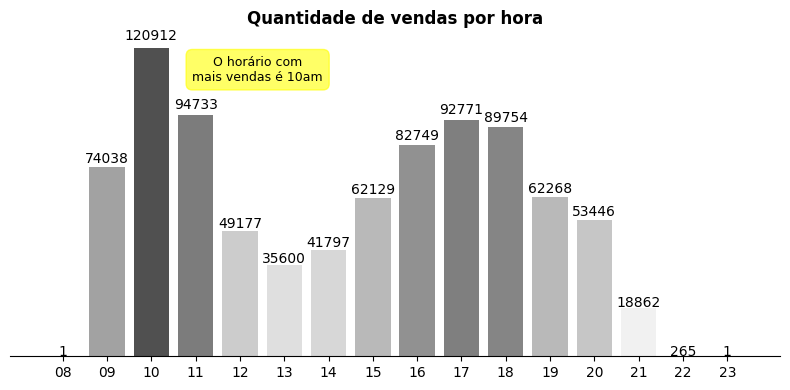

In [130]:
from matplotlib.colors import Normalize

fig,ax = plt.subplots(figsize=(8,4), tight_layout=True)

a = base.Hora.value_counts().sort_index()
norm = Normalize(vmin=0, vmax=160000)
cmap = plt.get_cmap('Greys')  
colors = cmap(norm(a.values))

ax.bar(a.index, a.values, color=colors)
ax.set_title('Quantidade de vendas por hora', fontweight='bold')
ax.spines[['top','left','right']].set_visible(False)
ax.yaxis.set_visible(False)
for i in range(0,len(a.index)):
    ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center')
ax.set_xticks(a.index)
ax.text(4.4, 108000, 'O horário com\nmais vendas é 10am', bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', edgecolor='yellow', alpha=0.6), fontsize=9, ha='center')
plt.show()

In [132]:
base['Dia da semana'] = base['Date'].dt.strftime("%A")
base.head(3)

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Dia,Mês,Hora,Total,Item Name,Category Name,Dia da semana
0,2020-07-01,09:15,102900005117056,0.396,7.6,sale,No,1,7,09,3.01,Paopaojiao (Jingpin),Capsicum,Wednesday
1,2020-07-01,09:17,102900005115960,0.849,3.2,sale,No,1,7,09,2.72,Chinese Cabbage,Flower/Leaf Vegetables,Wednesday
2,2020-07-01,09:17,102900005117056,0.409,7.6,sale,No,1,7,09,3.11,Paopaojiao (Jingpin),Capsicum,Wednesday


In [137]:
base['Dia da semana'].value_counts()

Dia da semana
Saturday     158939
Sunday       155626
Friday       121014
Monday       112947
Wednesday    112008
Tuesday      109697
Thursday     108272
Name: count, dtype: int64

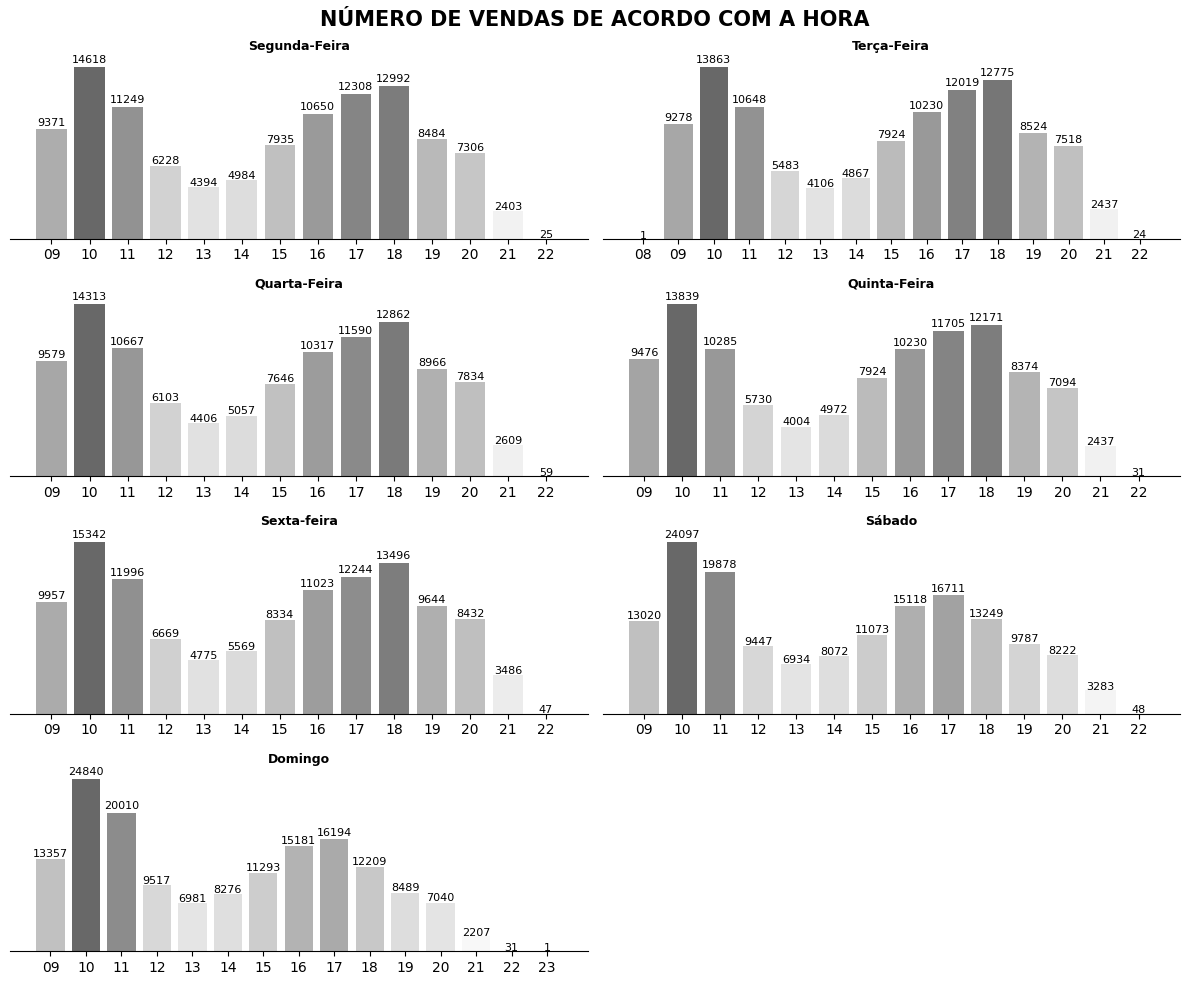

In [149]:
from matplotlib.colors import Normalize

dias = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
titulos = ['Segunda-Feira','Terça-Feira','Quarta-Feira','Quinta-Feira','Sexta-feira','Sábado','Domingo']

fig,axs = plt.subplots(ncols=2,nrows=4,figsize=(12,10),tight_layout=True)

for dia,ax,titulo in zip(dias,axs.flat, titulos):
    b = base.loc[base['Dia da semana'] == dia].copy()

    a = b.Hora.value_counts().sort_index()
    norm = Normalize(vmin=0, vmax=a.max()*1.5)
    cmap = plt.get_cmap('Greys')  
    colors = cmap(norm(a.values))

    ax.bar(a.index, a.values, color=colors)
    ax.set_title(f'{titulo}', fontweight='bold', fontsize=9)
    ax.spines[['top','left','right']].set_visible(False)
    ax.yaxis.set_visible(False)
    for i in range(0,len(a.index)):
        ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)
    ax.set_xticks(a.index)
axs[3][1].axis('off')

plt.suptitle("NÚMERO DE VENDAS DE ACORDO COM A HORA", fontsize=15, fontweight='bold')
plt.show()

### Analisando as categorias

Fazer em outro notebook

Aquatic

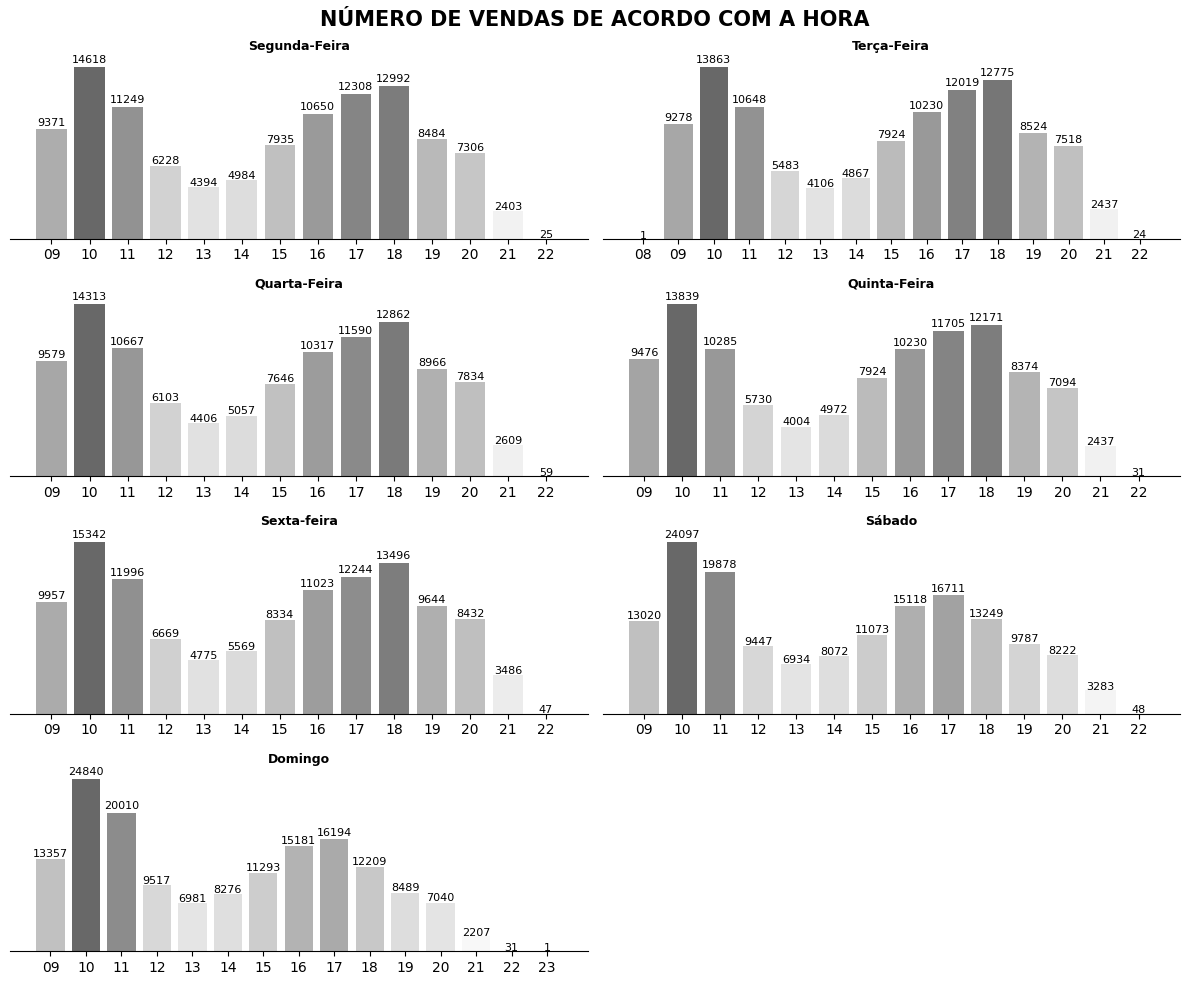

In [153]:
from matplotlib.colors import Normalize

dias = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
titulos = ['Segunda-Feira','Terça-Feira','Quarta-Feira','Quinta-Feira','Sexta-feira','Sábado','Domingo']

fig,axs = plt.subplots(ncols=2,nrows=4,figsize=(12,10),tight_layout=True)
base_aquatic = base.loc[base['Category Name'] == 'Capsicum']

for dia,ax,titulo in zip(dias,axs.flat, titulos):
    b = base.loc[base['Dia da semana'] == dia].copy()

    a = b.Hora.value_counts().sort_index()
    norm = Normalize(vmin=0, vmax=a.max()*1.5)
    cmap = plt.get_cmap('Greys')  
    colors = cmap(norm(a.values))

    ax.bar(a.index, a.values, color=colors)
    ax.set_title(f'{titulo}', fontweight='bold', fontsize=9)
    ax.spines[['top','left','right']].set_visible(False)
    ax.yaxis.set_visible(False)
    for i in range(0,len(a.index)):
        ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)
    ax.set_xticks(a.index)
axs[3][1].axis('off')

plt.suptitle("NÚMERO DE VENDAS DE ACORDO COM A HORA", fontsize=15, fontweight='bold')
plt.show()

### **Produtos mais vendidos por hora**

In [ ]:
from matplotlib.colors import Normalize

dias = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
titulos = ['Segunda-Feira','Terça-Feira','Quarta-Feira','Quinta-Feira','Sexta-feira','Sábado','Domingo']

fig,axs = plt.subplots(ncols=2,nrows=4,figsize=(12,10),tight_layout=True)
base_aquatic = base.loc[base['Category Name'] == 'Capsicum']

for dia,ax,titulo in zip(dias,axs.flat, titulos):
    b = base.loc[base['Dia da semana'] == dia].copy()

    a = b.Hora.value_counts().sort_index()
    norm = Normalize(vmin=0, vmax=a.max()*1.5)
    cmap = plt.get_cmap('Greys')  
    colors = cmap(norm(a.values))

    ax.bar(a.index, a.values, color=colors)
    ax.set_title(f'{titulo}', fontweight='bold', fontsize=9)
    ax.spines[['top','left','right']].set_visible(False)
    ax.yaxis.set_visible(False)
    for i in range(0,len(a.index)):
        ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)
    ax.set_xticks(a.index)
axs[3][1].axis('off')

plt.suptitle("NÚMERO DE VENDAS DE ACORDO COM A HORA", fontsize=15, fontweight='bold')
plt.show()

In [155]:
base.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Dia,Mês,Hora,Total,Item Name,Category Name,Dia da semana
0,2020-07-01,09:15,102900005117056,0.396,7.6,sale,No,1,7,09,3.01,Paopaojiao (Jingpin),Capsicum,Wednesday
1,2020-07-01,09:17,102900005115960,0.849,3.2,sale,No,1,7,09,2.72,Chinese Cabbage,Flower/Leaf Vegetables,Wednesday
2,2020-07-01,09:17,102900005117056,0.409,7.6,sale,No,1,7,09,3.11,Paopaojiao (Jingpin),Capsicum,Wednesday
3,2020-07-01,09:19,102900005115823,0.421,10.0,sale,No,1,7,09,4.21,Shanghaiqing,Flower/Leaf Vegetables,Wednesday
4,2020-07-01,09:20,102900005115908,0.539,8.0,sale,No,1,7,09,4.31,Caixin,Flower/Leaf Vegetables,Wednesday


In [162]:
base['Item Name'].value_counts().sort_values(ascending=False).head(5)

Item Name
Wuhu Green Pepper (1)    69945
Broccoli                 58906
Xixia Mushroom (1)       47509
Yunnan Shengcai          39887
Net Lotus Root (1)       39285
Name: count, dtype: int64

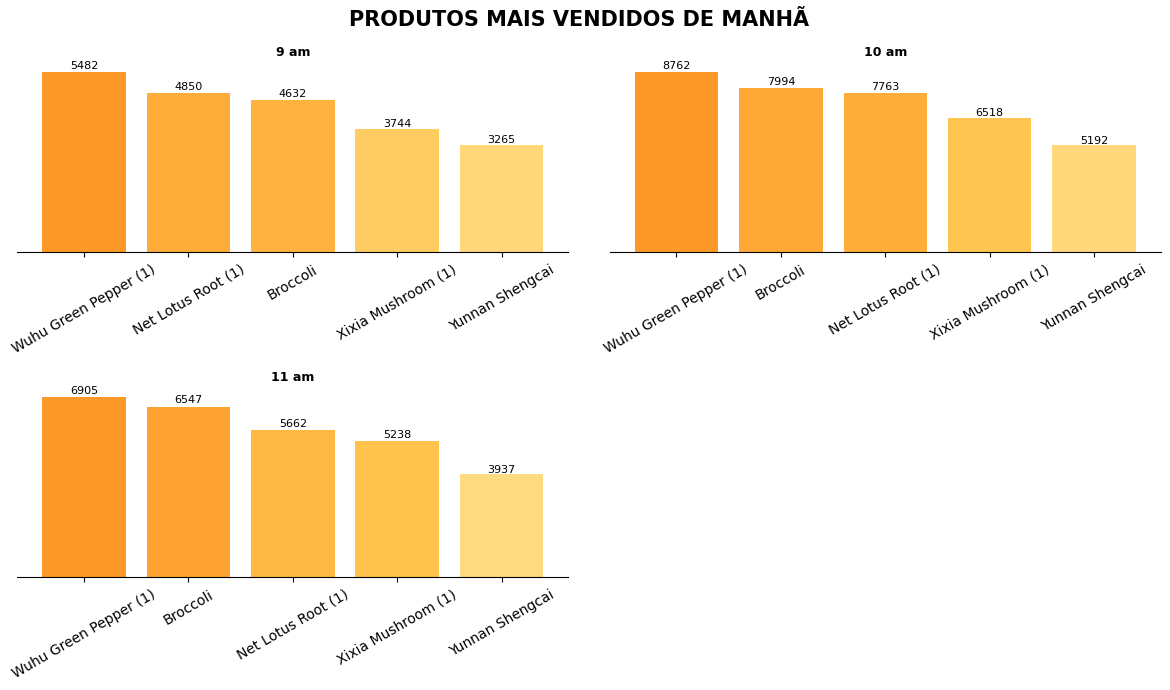

In [171]:
horas = ['09','10','11']
titulos = ['9h','10h','11h']

fig,axs = plt.subplots(ncols=2,nrows=2,figsize=(12,7),tight_layout=True)

for hora,ax,titulo in zip(horas,axs.flat, titulos):
    
    b = base.loc[base['Hora'] == hora].copy()
    a = b['Item Name'].value_counts().sort_values(ascending=False).head(5)
    norm = Normalize(vmin=0, vmax=a.max()*2)
    cmap = plt.get_cmap('YlOrBr')  
    colors = cmap(norm(a.values))

    ax.bar(a.index, a.values, color=colors)
    ax.set_title(f'{titulo}', fontweight='bold', fontsize=9)
    ax.spines[['top','left','right']].set_visible(False)
    ax.yaxis.set_visible(False)
    for i in range(0,len(a.index)):
        ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)
    ax.set_xticks(a.index)
    ax.set_xticklabels(labels=a.index, rotation=30)
axs[1][1].axis('off')

plt.suptitle("PRODUTOS MAIS VENDIDOS DE MANHÃ", fontsize=15, fontweight='bold')
plt.show()

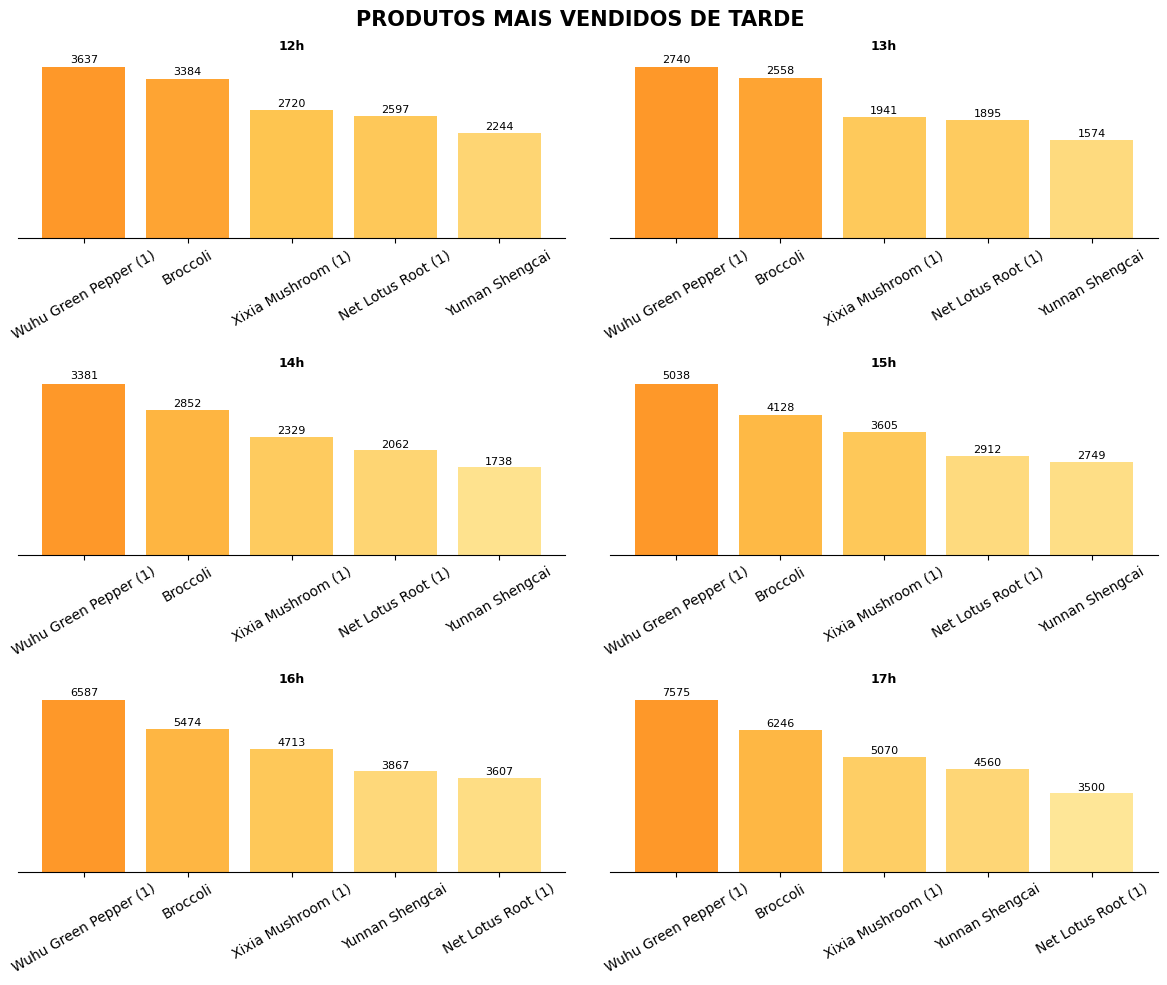

In [173]:
horas = ['12','13','14','15','16','17']
titulos = ['12h','13h','14h','15h','16h','17h']

fig,axs = plt.subplots(ncols=2,nrows=3,figsize=(12,10),tight_layout=True)

for hora,ax,titulo in zip(horas,axs.flat, titulos):
    
    b = base.loc[base['Hora'] == hora].copy()
    a = b['Item Name'].value_counts().sort_values(ascending=False).head(5)
    norm = Normalize(vmin=0, vmax=a.max()*2)
    cmap = plt.get_cmap('YlOrBr')  
    colors = cmap(norm(a.values))

    ax.bar(a.index, a.values, color=colors)
    ax.set_title(f'{titulo}', fontweight='bold', fontsize=9)
    ax.spines[['top','left','right']].set_visible(False)
    ax.yaxis.set_visible(False)
    for i in range(0,len(a.index)):
        ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)
    ax.set_xticks(a.index)
    ax.set_xticklabels(labels=a.index, rotation=30)

plt.suptitle("PRODUTOS MAIS VENDIDOS DE TARDE", fontsize=15, fontweight='bold')
plt.show()

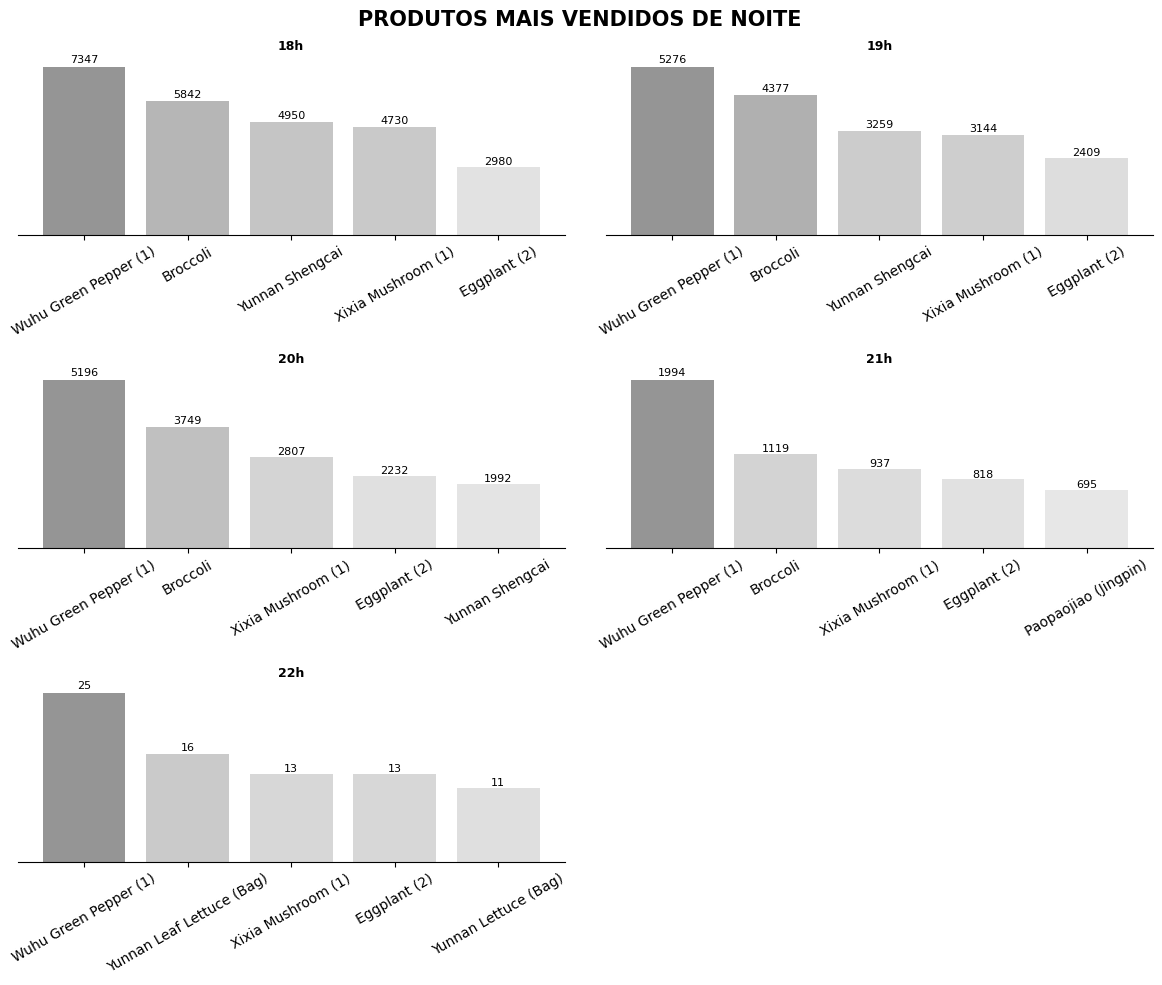

In [177]:
horas = ['18','19','20','21','22']
titulos = ['18h','19h','20h','21h','22h']

fig,axs = plt.subplots(ncols=2,nrows=3,figsize=(12,10),tight_layout=True)

for hora,ax,titulo in zip(horas,axs.flat, titulos):
    
    b = base.loc[base['Hora'] == hora].copy()
    a = b['Item Name'].value_counts().sort_values(ascending=False).head(5)
    norm = Normalize(vmin=0, vmax=a.max()*2)
    cmap = plt.get_cmap('Greys')  
    colors = cmap(norm(a.values))

    ax.bar(a.index, a.values, color=colors)
    ax.set_title(f'{titulo}', fontweight='bold', fontsize=9)
    ax.spines[['top','left','right']].set_visible(False)
    ax.yaxis.set_visible(False)
    for i in range(0,len(a.index)):
        ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)
    ax.set_xticks(a.index)
    ax.set_xticklabels(labels=a.index, rotation=30)
axs[2][1].axis('off')
plt.suptitle("PRODUTOS MAIS VENDIDOS DE NOITE", fontsize=15, fontweight='bold')
plt.show()

### **Criando base com a porcentagem de vendas por hora**

In [182]:
base[['Date','Time','Hora','Dia','Mês','Dia da semana','Item Code','Item Name','Category Name',
      'Quantity Sold (kilo)','Unit Selling Price (RMB/kg)','Sale or Return','Discount (Yes/No)','Total']]

,Date,Time,Hora,Dia,Mês,Dia da semana,Item Code,Item Name,Category Name,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Total
0,2020-07-01,09:15,09,1,7,Wednesday,102900005117056,Paopaojiao (Jingpin),Capsicum,0.396,7.6,sale,No,3.01
1,2020-07-01,09:17,09,1,7,Wednesday,102900005115960,Chinese Cabbage,Flower/Leaf Vegetables,0.849,3.2,sale,No,2.72
2,2020-07-01,09:17,09,1,7,Wednesday,102900005117056,Paopaojiao (Jingpin),Capsicum,0.409,7.6,sale,No,3.11
3,2020-07-01,09:19,09,1,7,Wednesday,102900005115823,Shanghaiqing,Flower/Leaf Vegetables,0.421,10.0,sale,No,4.21
4,2020-07-01,09:20,09,1,7,Wednesday,102900005115908,Caixin,Flower/Leaf Vegetables,0.539,8.0,sale,No,4.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878498,2023-06-30,21:35,21,30,6,Friday,102900005115250,Xixia Black Mushroom (1),Edible Mushroom,0.284,24.0,sale,No,6.82
878499,2023-06-30,21:35,21,30,6,Friday,102900011022764,Changxianqie,Solanum,0.669,12.0,sale,No,8.03
878500,2023-06-30,21:35,21,30,6,Friday,102900005115250,Xixia Black Mushroom (1),Edible Mushroom,0.125,24.0,sale,No,3.00
878501,2023-06-30,21:35,21,30,6,Friday,102900011016701,Wuhu Green Pepper (1),Capsicum,0.252,5.2,sale,No,1.31


In [187]:
aquatic_tuberous_vegetables = base.loc[base['Category Name'] == 'Aquatic Tuberous Vegetables']
cabbage = base.loc[base['Category Name'] == 'Cabbage']
capsicum = base.loc[base['Category Name'] == 'Capsicum']
ediblemushroom = base.loc[base['Category Name'] == 'Edible Mushroom']
flower_leaf_vegetables = base.loc[base['Category Name'] == 'Flower/Leaf Vegetables']
solanum = base.loc[base['Category Name'] == 'Solanum']

aquatic_tuberous_vegetables.to_csv('../data/categoria_aquatic.csv', index=False)
cabbage.to_csv('../data/categoria_cabbage.csv', index=False)
capsicum.to_csv('../data/categoria_capsicum.csv', index=False)
ediblemushroom.to_csv('../data/categoria_mushroom.csv', index=False)
flower_leaf_vegetables.to_csv('../data/categoria_flower_leaf_vegetables.csv', index=False)
solanum.to_csv('../data/categoria_solanum.csv', index=False)

In [179]:
tabela_vendas_por_hora = base.pivot_table(index='Item Name', columns='Hora', aggfunc='size', fill_value=0)

tabela_vendas_por_hora.columns = [f'{hora}h' for hora in tabela_vendas_por_hora.columns]
total_vendas_por_produto = tabela_vendas_por_hora.sum(axis=1)
percentual_vendas_por_hora = tabela_vendas_por_hora.div(total_vendas_por_produto, axis=0) * 100
percentual_vendas_por_hora = percentual_vendas_por_hora.round(2)

percentual_vendas_por_hora.head()

,08h,09h,10h,11h,12h,13h,14h,15h,16h,17h,18h,19h,20h,21h,22h,23h
Item Name,,,,,,,,,,,,,,,,
7 Colour Pepper (1),0.0,4.41,9.87,8.94,6.16,5.23,5.46,8.59,10.69,10.45,7.67,8.25,10.22,4.07,0.00,0.0
7 Colour Pepper (2),0.0,7.09,10.59,10.21,4.54,4.44,5.20,6.14,7.75,8.88,10.11,8.32,11.44,5.29,0.00,0.0
7 Colour Pepper (Bag),0.0,5.56,5.56,0.00,0.00,0.00,16.67,0.00,22.22,11.11,11.11,16.67,11.11,0.00,0.00,0.0
Agaricus Bisporus (Bag),0.0,20.00,0.00,10.00,0.00,10.00,0.00,0.00,10.00,30.00,20.00,0.00,0.00,0.00,0.00,0.0
Agaricus Bisporus (Box),0.0,7.44,11.89,9.83,4.70,4.11,4.68,6.10,8.10,9.74,9.03,9.59,10.47,4.18,0.14,0.0


In [180]:
percentual_vendas_por_hora.to_csv("../data/porcentagem_vendas_hora.csv")